# Exercise 1
## b)
Consider the US crime data set but use only the variables “PctKids2Par”, “NumStreet” and “racePctWhite” as well as an intercept column. Implement an appropriate
MCMC algorithm that allows you to sample from the d = 4 dimensional posterior density
p(β|Y ) ∝ p(Y |β)πλ(β).

In [2]:
import pandas as pd

file_path = 'communities.csv'

# adding column names to my dataframe
column_names = [
    'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize',
    'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
    'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
    'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
    'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov',
    'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
    'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf',
    'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
    'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
    'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8',
    'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
    'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
    'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup',
    'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
    'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb',
    'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ',
    'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters',
    'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85',
    'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
    'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
    'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor',
    'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens',
    'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy',
    'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop'
]

data = pd.read_csv(file_path, names=column_names)

# columns for use
selected_columns = ['PctKids2Par', 'NumStreet', 'racePctWhite']

# intercept column
data['intercept'] = 1

# making X and Y
X = data[['intercept'] + selected_columns]
Y = data['ViolentCrimesPerPop']

In [3]:
X.head()

,intercept,PctKids2Par,NumStreet,racePctWhite
0,1,0.59,0.0,0.90
1,1,0.47,0.0,0.74
2,1,0.44,0.0,0.56
3,1,0.54,0.0,0.08
4,1,0.91,0.0,0.95


In [4]:
Y.head()

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

In [15]:
posterior(Y, X, [0,0,0,0], 1)

9.685399609883869e-49

In [12]:
Y - np.dot(X, [0,0,0,0])

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

In [13]:
Y

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

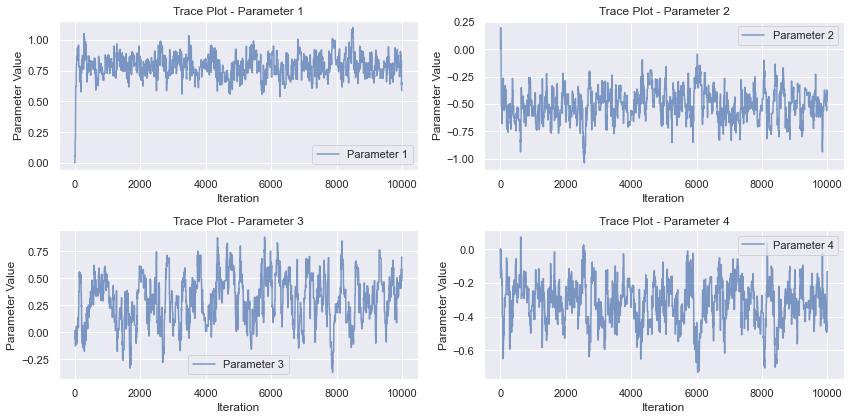

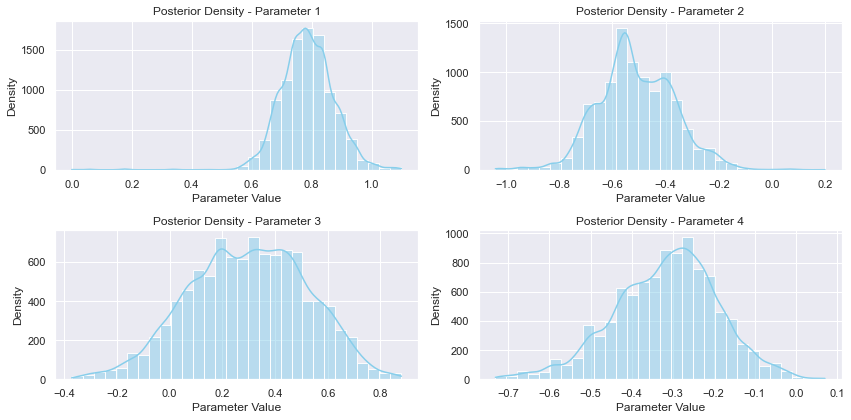

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def likelihood(Y, X, beta):
    """
    Likelyhood function for Gaussian model that was defined.
    Arguments:
    - Y: target feature
    - X: independant features
    - beta: weight parameter
    """
    error = Y - np.dot(X, beta)
    exponent = -0.5 * np.dot(error.T, error)
    return np.exp(exponent)

def prior(beta, lambda_val):
    """
    Prior function for Gaussian model.
    Arguments:
    - beta: weight parameter
    - lambda_val: tuning parameter
    """
    return np.prod(np.exp(-lambda_val * np.abs(beta)))

def posterior(Y, X, beta, lambda_val):
    """
    Posterior function for Gaussian model.
    Arguments: the same as in the last two functions.
    """
    return likelihood(Y, X, beta) * prior(beta, lambda_val)


def metropolis_hastings(Y, X, lambda_val, n_iterations):
    """
    Function for metropolis hastings sampling of given posterior distribution.
    Arguments:
    - n_iterations: number of iterations of the algorithm.
    - the rest is the same
    """
    # setting initial betas to zero
    n_params = X.shape[1]
    beta_current = np.zeros(n_params) 

    samples = []

    for _ in range(n_iterations):
        # new proposal beta
        beta_proposed = beta_current + np.random.normal(0, 0.1, n_params)

        # acceptance ratio calculation
        acceptance_ratio = posterior(Y, X, beta_proposed, lambda_val) / posterior(Y, X, beta_current, lambda_val)

        # accept/reject
        if np.random.rand() < acceptance_ratio:
            beta_current = beta_proposed

        # append the chosen beta
        samples.append(beta_current.copy())

    return np.array(samples)

# setting lambda val
lambda_val = 1.0
samples = metropolis_hastings(Y, X, lambda_val, n_iterations=10000)

# visualization
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
for i in range(samples.shape[1]):
    plt.subplot(2, 2, i + 1)
    plt.plot(samples[:, i], label=f'Parameter {i + 1}', color='b', alpha=0.7)
    plt.title(f'Trace Plot - Parameter {i + 1}')
    plt.xlabel('Iteration')
    plt.ylabel('Parameter Value')
    plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i in range(samples.shape[1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(samples[:, i], bins=30, kde=True, color='skyblue')
    plt.title(f'Posterior Density - Parameter {i + 1}')
    plt.xlabel('Parameter Value')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [18]:
np.mean(samples,axis=0)

array([ 0.78623149, -0.51084928,  0.29909416, -0.31575934])

## c) 
For each parameter βj , j = 1, . . . , 4, (numerically) compute a (one-dimensional)
95% Bayesian credible interval. How do these intervals change as λ changes? Provide
some visualization.

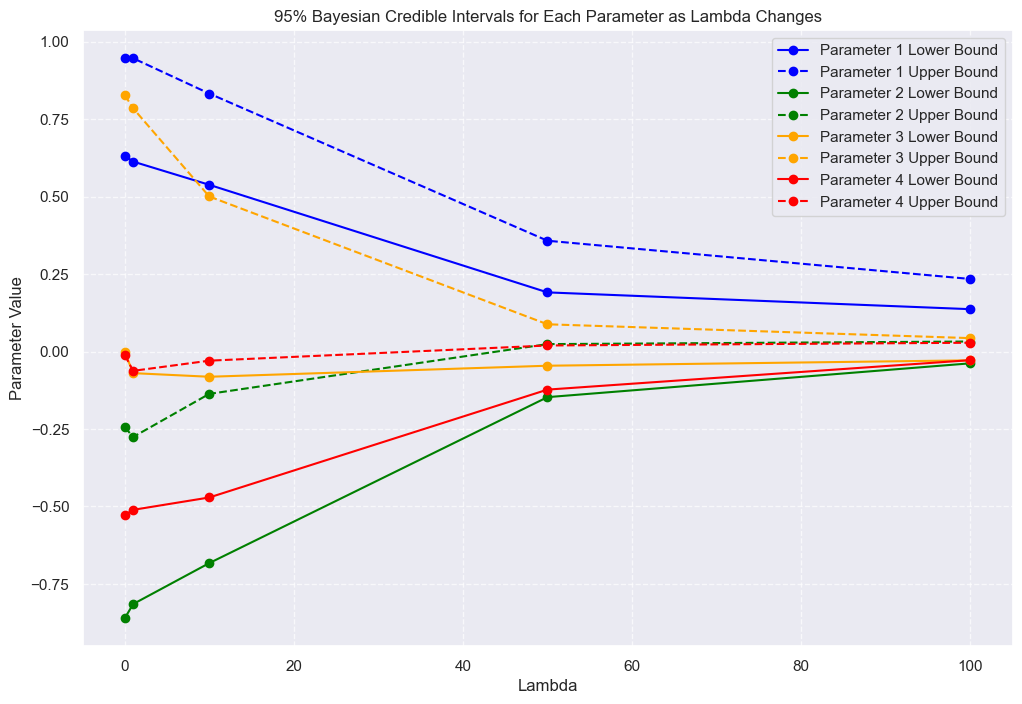

In [5]:
# lambda values to plot for
lambda_values = [0.01, 1.0, 10.0, 50.0, 100.0]

def credible_interval(parameter_samples):
    """
    Function for computing 95% bayesian credible interval.
    Arguments:
    - parameter_samples: samples drawn with metropolis hastings
    """
    lower_bound = np.percentile(parameter_samples, 2.5)
    upper_bound = np.percentile(parameter_samples, 97.5)
    return lower_bound, upper_bound

# list for storing intervals for lambdas
credible_intervals = []

for lambda_val in lambda_values:
    # drawing samples from metropolis hastings
    samples_lambda = metropolis_hastings(Y, X, lambda_val, n_iterations=10000)

    # computing intervals
    lambda_intervals = []
    for j in range(samples_lambda.shape[1]):
        interval = credible_interval(samples_lambda[:, j])
        lambda_intervals.append(interval)
    
    credible_intervals.append(lambda_intervals)

# visualization
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'orange', 'red']

for j in range(samples.shape[1]):
    lower_bounds = [interval[j][0] for interval in credible_intervals]
    upper_bounds = [interval[j][1] for interval in credible_intervals]

    plt.plot(lambda_values, lower_bounds, marker='o', linestyle='-', color=colors[j],
             label=f'Parameter {j + 1} Lower Bound')
    plt.plot(lambda_values, upper_bounds, marker='o', linestyle='--', color=colors[j],
             label=f'Parameter {j + 1} Upper Bound')

plt.title('95% Bayesian Credible Intervals for Each Parameter as Lambda Changes')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## d)
Visualize the two-dimensional (marginal) posterior density of “PctKids2Par” and
“NumStreet” for a few different values of λ.
# Plotting in 2d

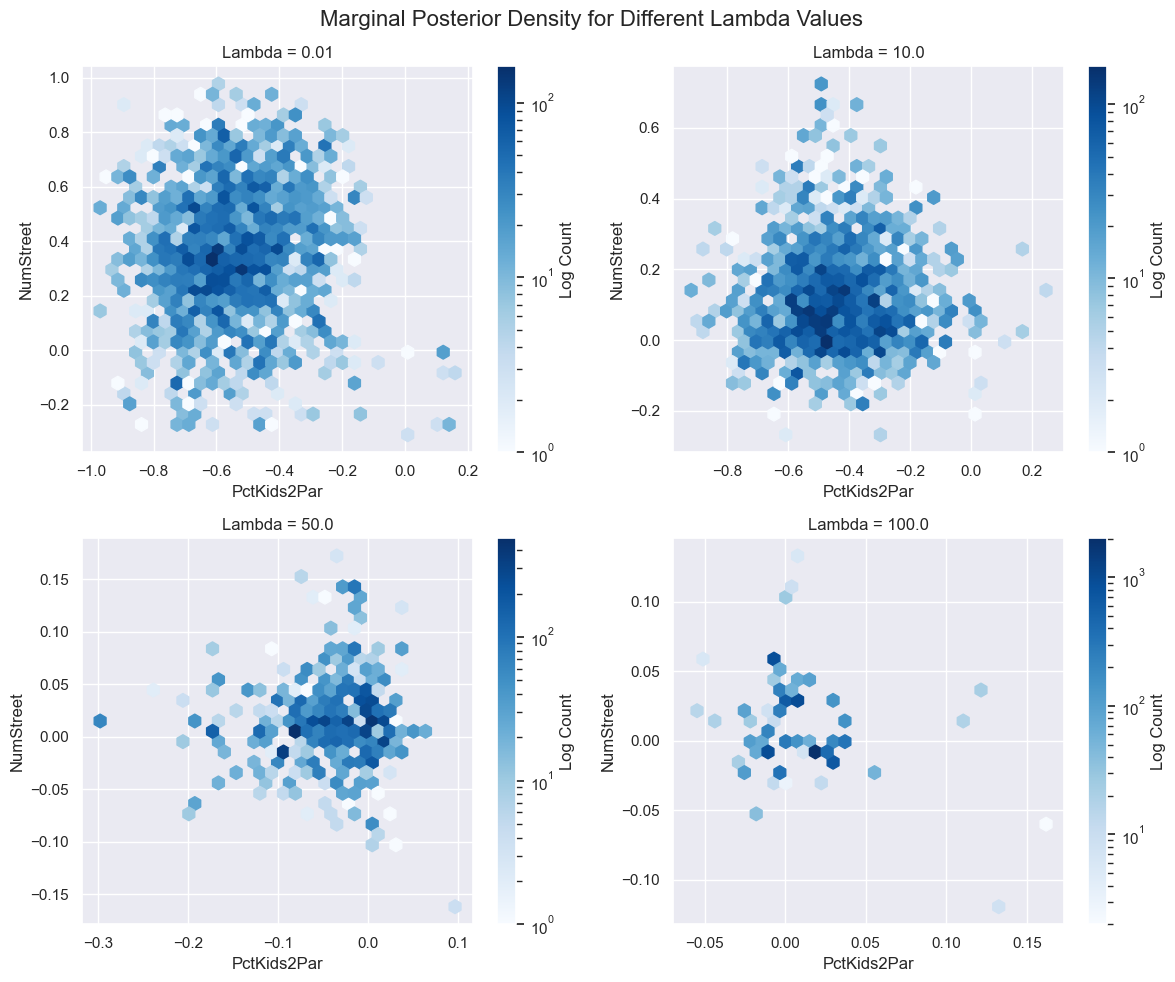

In [6]:
# lambda values to plot
lambda_values = [0.01, 10.0, 50.0, 100.0]

# list for storing samples
samples_lambda_list = []

# drawing samples for each lambda
for lambda_val in lambda_values:
    samples_lambda = metropolis_hastings(Y, X, lambda_val, n_iterations=10000)
    samples_lambda_list.append(samples_lambda)

# visualation
plt.figure(figsize=(12, 10))
plt.suptitle('Marginal Posterior Density for Different Lambda Values', fontsize=16)
for i, lambda_val in enumerate(lambda_values):
    plt.subplot(2, 2, i + 1)
    
    # drawing samples for PctKids2Par and NumStreet
    samples_lambda = samples_lambda_list[i]
    pct_kids_samples = samples_lambda[:, 1]  
    num_street_samples = samples_lambda[:, 2]  
    
    # plotting
    plt.hexbin(pct_kids_samples, num_street_samples, gridsize=30, cmap='Blues', bins='log', mincnt=1)
    plt.title(f'Lambda = {lambda_val}')
    plt.xlabel('PctKids2Par')
    plt.ylabel('NumStreet')
    plt.colorbar(label='Log Count')

plt.tight_layout()
plt.show()

# Plotting in 3d

In [7]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from scipy.stats import gaussian_kde
import plotly.subplots as sp

pio.renderers.default = 'iframe'

fig = go.Figure()

# plotting for lambda = 0.1
samples_lambda = samples_lambda_list[0]

# computing KDE for 'PctKids2Par' and 'NumStreet'
kde = gaussian_kde(samples_lambda[:, [1, 2]].T)
x_vals, y_vals = np.meshgrid(np.linspace(min(samples_lambda[:, 1]), max(samples_lambda[:, 1]), 50),
                             np.linspace(min(samples_lambda[:, 2]), max(samples_lambda[:, 2]), 50))
z_vals = kde(np.vstack([x_vals.ravel(), y_vals.ravel()]))

fig.add_trace(go.Surface(x=x_vals, y=y_vals, z=z_vals.reshape(x_vals.shape),
                         colorscale='Viridis', opacity=0.7,
                         name=f'Lambda = {lambda_val}'))

fig.update_layout(
    scene=dict(
        xaxis_title='PctKids2Par',
        yaxis_title='NumStreet',
        zaxis_title='Density'
    ),
    title='Marginal Posterior Density with KDE for lambda = 0.1',
    showlegend=True
)

fig.show()

In [8]:
fig = go.Figure()

# plotting for lambda = 0.5
samples_lambda = samples_lambda_list[1]

# computing KDE for 'PctKids2Par' and 'NumStreet'
kde = gaussian_kde(samples_lambda[:, [1, 2]].T)
x_vals, y_vals = np.meshgrid(np.linspace(min(samples_lambda[:, 1]), max(samples_lambda[:, 1]), 50),
                             np.linspace(min(samples_lambda[:, 2]), max(samples_lambda[:, 2]), 50))
z_vals = kde(np.vstack([x_vals.ravel(), y_vals.ravel()]))

fig.add_trace(go.Surface(x=x_vals, y=y_vals, z=z_vals.reshape(x_vals.shape),
                         colorscale='Viridis', opacity=0.7,
                         name=f'Lambda = {lambda_val}'))

fig.update_layout(
    scene=dict(
        xaxis_title='PctKids2Par',
        yaxis_title='NumStreet',
        zaxis_title='Density'
    ),
    title='Marginal Posterior Density with KDE for lambda = 10.0',
    showlegend=True
)

fig.show()

In [9]:
fig = go.Figure()

# plotting for lambda = 1.0
samples_lambda = samples_lambda_list[2]

# computing KDE for 'PctKids2Par' and 'NumStreet'
kde = gaussian_kde(samples_lambda[:, [1, 2]].T)
x_vals, y_vals = np.meshgrid(np.linspace(min(samples_lambda[:, 1]), max(samples_lambda[:, 1]), 50),
                             np.linspace(min(samples_lambda[:, 2]), max(samples_lambda[:, 2]), 50))
z_vals = kde(np.vstack([x_vals.ravel(), y_vals.ravel()]))

fig.add_trace(go.Surface(x=x_vals, y=y_vals, z=z_vals.reshape(x_vals.shape),
                         colorscale='Viridis', opacity=0.7,
                         name=f'Lambda = {lambda_val}'))

fig.update_layout(
    scene=dict(
        xaxis_title='PctKids2Par',
        yaxis_title='NumStreet',
        zaxis_title='Density'
    ),
    title='Marginal Posterior Density with KDE for lambda = 50.0',
    showlegend=True
)

fig.show()

In [10]:
fig = go.Figure()

# plotting for lambda = 2.0
samples_lambda = samples_lambda_list[3]

# computing KDE for 'PctKids2Par' and 'NumStreet'
kde = gaussian_kde(samples_lambda[:, [1, 2]].T)
x_vals, y_vals = np.meshgrid(np.linspace(min(samples_lambda[:, 1]), max(samples_lambda[:, 1]), 50),
                             np.linspace(min(samples_lambda[:, 2]), max(samples_lambda[:, 2]), 50))
z_vals = kde(np.vstack([x_vals.ravel(), y_vals.ravel()]))

fig.add_trace(go.Surface(x=x_vals, y=y_vals, z=z_vals.reshape(x_vals.shape),
                         colorscale='Viridis', opacity=0.7,
                         name=f'Lambda = {lambda_val}'))

fig.update_layout(
    scene=dict(
        xaxis_title='PctKids2Par',
        yaxis_title='NumStreet',
        zaxis_title='Density'
    ),
    title='Marginal Posterior Density with KDE for lambda = 100.0',
    showlegend=True
)

fig.show()

# **Exercise 2**. 
### Design a pivotal bootstrap type resampling scheme for constructing confidence intervals for population graph totals in statistical network analysis.
## Subtask a)
Implement it on the Facebook data set from the lecture to obtain a bootstrap confidence interval for the population proportion of TV-politics edges and **plot the bootstrap
distribution of your estimato**r for just a handful of different random samples. Pick any
graph sampling design you consider reasonable. Proceed as in the lecture, assuming that
you don’t have access to neither E nor NE, but that you can only retrieve edge information
once you have sampled one of its incident vertices.


In [11]:
edges = pd.read_csv('musae_facebook_edges.csv')
edges.head()

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829


In [12]:
nodes = pd.read_csv('musae_facebook_target.csv')
nodes.head()

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician


In [13]:
# dropping facebook id and page name columns
nodes = nodes.drop('page_name', axis=1)
nodes = nodes.drop('facebook_id', axis=1)

# removing company and gouvernment category
nodes = nodes[nodes['page_type'] != 'company']
nodes = nodes[nodes['page_type'] != 'government']

nodes.head()

,id,page_type
0,0,tvshow
4,4,politician
5,5,politician
6,6,politician
7,7,politician


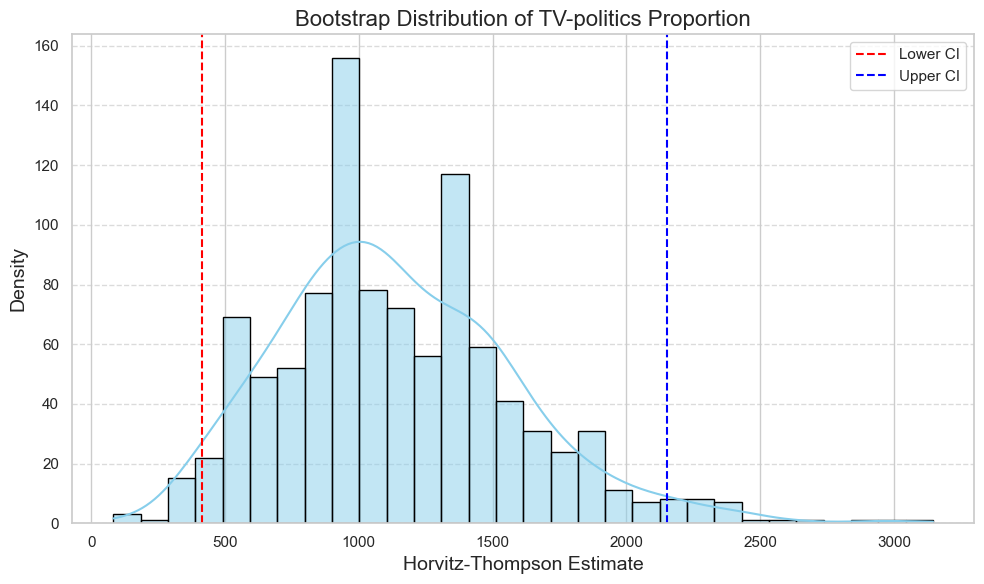

Bootstrap Confidence Interval: [ 413.96361361 2152.61079079]


In [14]:
# Constants
B = 1000  # Number of bootstrap samples
n = 1000  # Size of each induced subgraph sample

# Function to calculate Horvitz-Thompson estimate
def horvitz_thompson_estimate(sample_edges_count, NV, n):
    fi = n * (n - 1) / (NV * (NV - 1))
    return sample_edges_count / fi

# Bootstrap procedure
bootstrap_estimates = []

for _ in range(B):
    # Step 1: Draw Vú of size n uniformly from V with replacement
    sample_vertices = np.random.choice(nodes['id'], size=n, replace=True)

    # Step 2: Choose Eú
    sample_edges = edges[
        (edges['id_1'].isin(sample_vertices)) & (edges['id_2'].isin(sample_vertices))
    ].merge(nodes[['id', 'page_type']], how='left', left_on='id_1', right_on='id').merge(
        nodes[['id', 'page_type']], how='left', left_on='id_2', right_on='id'
    )

    # Filter edges connecting TV-shows with politicians or government agencies
    tv_politics_edges = sample_edges[
        (sample_edges['page_type_x'] == 'tvshow') & (
            (sample_edges['page_type_y'] == 'politician')
        ) | (sample_edges['page_type_x'] == 'politician') & (
            (sample_edges['page_type_y'] == 'tvshow')
        )
    ]

    # Step 3: Calculate Horvitz-Thompson estimate
    NV = len(nodes)
    estimate = horvitz_thompson_estimate(tv_politics_edges.shape[0], NV, n)
    bootstrap_estimates.append(estimate)

# Calculate confidence interval
confidence_interval = np.percentile(bootstrap_estimates, [2.5, 97.5])

# Set a seaborn style for improved aesthetics
sns.set(style="whitegrid")

# Plot the bootstrap distribution with KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_estimates, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label='Lower CI')
plt.axvline(x=confidence_interval[1], color='blue', linestyle='--', label='Upper CI')

# Enhance the plot aesthetics
plt.title('Bootstrap Distribution of TV-politics Proportion', fontsize=16)
plt.xlabel('Horvitz-Thompson Estimate', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Bootstrap Confidence Interval:", confidence_interval)

Calculating the real number of edges for TV-politician relationship.

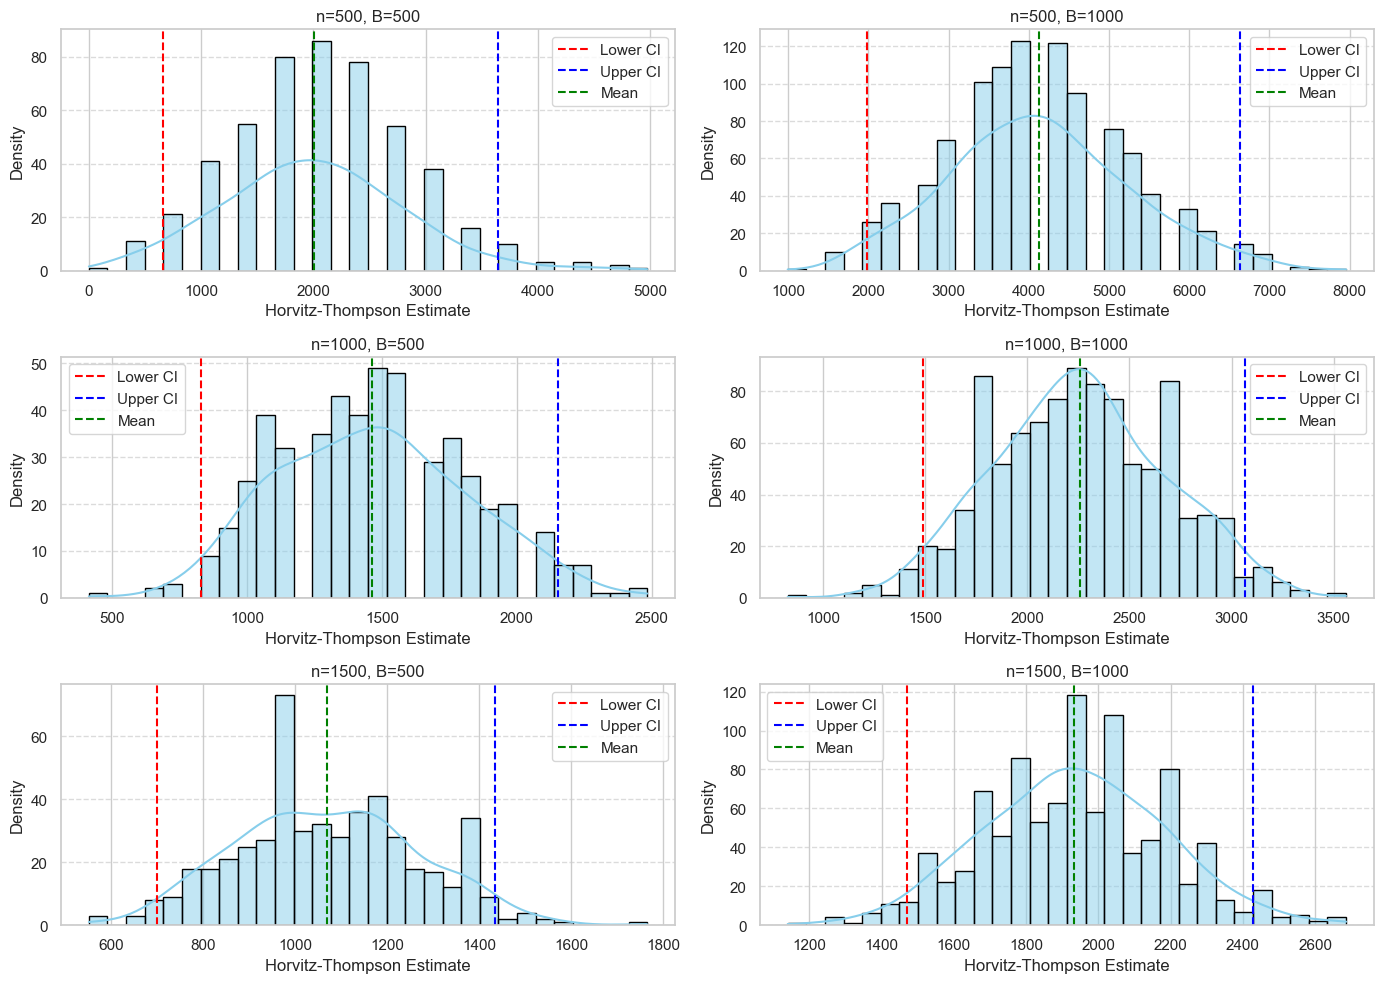

In [15]:
# Constants
n_values = [500, 1000, 1500]  # Different sizes of each induced subgraph sample
B_values = [500, 1000]  # Different number of bootstrap samples

# Set a seaborn style for improved aesthetics
sns.set(style="whitegrid")

# Function to calculate Horvitz-Thompson estimate
def horvitz_thompson_estimate(sample_edges_count, NV, n):
    fi = n * (n - 1) / (NV * (NV - 1))
    return sample_edges_count / fi

# Create subplots
fig, axes = plt.subplots(len(n_values), len(B_values), figsize=(14, 10))

for i, n in enumerate(n_values):
    for j, B in enumerate(B_values):
        # Bootstrap procedure
        bootstrap_estimates = []

        # Induced subgraph
        subgraph_vertices = np.random.choice(nodes['id'], size=n, replace=False)
        subgraph_edges = edges[
                (edges['id_1'].isin(subgraph_vertices)) & (edges['id_2'].isin(subgraph_vertices))
            ]

        for _ in range(B):
            # Step 1: Draw Vú of size n uniformly from V with replacement
            sample_edges = subgraph_edges.sample(n=n, replace=True)

            # Step 2: Choose Eú
            sample_edges = sample_edges.merge(nodes[['id', 'page_type']], how='left', left_on='id_1', right_on='id').merge(
                nodes[['id', 'page_type']], how='left', left_on='id_2', right_on='id'
            )

            # Filter edges connecting TV-shows with politicians or government agencies
            tv_politics_edges = sample_edges[
                (sample_edges['page_type_x'] == 'tvshow') & (
                    (sample_edges['page_type_y'] == 'politician')
                ) | (sample_edges['page_type_x'] == 'politician') & (
                    (sample_edges['page_type_y'] == 'tvshow')
                )
            ]
            # Step 3: Calculate Horvitz-Thompson estimate
            NV = len(nodes)
            estimate = horvitz_thompson_estimate(tv_politics_edges.shape[0], NV, n)
            bootstrap_estimates.append(estimate)

        # Calculate confidence interval
        confidence_interval = np.percentile(bootstrap_estimates, [2.5, 97.5])
        mean_value = np.mean(bootstrap_estimates)

        # Plot the bootstrap distribution with KDE (Kernel Density Estimate)
        sns.histplot(bootstrap_estimates, bins=30, kde=True, color='skyblue', edgecolor='black', ax=axes[i, j])
        axes[i, j].axvline(x=confidence_interval[0], color='red', linestyle='--', label='Lower CI')
        axes[i, j].axvline(x=confidence_interval[1], color='blue', linestyle='--', label='Upper CI')

        # Add line and annotation for the mean value
        axes[i, j].axvline(x=mean_value, color='green', linestyle='--', label='Mean')

        # Set plot titles and labels
        axes[i, j].set_title(f'n={n}, B={B}')
        axes[i, j].set_xlabel('Horvitz-Thompson Estimate')
        axes[i, j].set_ylabel('Density')
        axes[i, j].legend()
        axes[i, j].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
nodes_full = pd.read_csv('musae_facebook_target.csv')
conn = 0
for index, ids in edges.iterrows():
    id1 = ids['id_1']
    id2 = ids['id_2']
    if((nodes_full['page_type'][id1] == 'tvshow') & (nodes_full['page_type'][id2] == 'politician') | 
       (nodes_full['page_type'][id2] == 'tvshow') & (nodes_full['page_type'][id1] == 'politician')):
        conn+=1

In [17]:
print(f"Real number of edges for TV/politician is: {conn}.")

Real number of edges for TV/politician is: 1268.


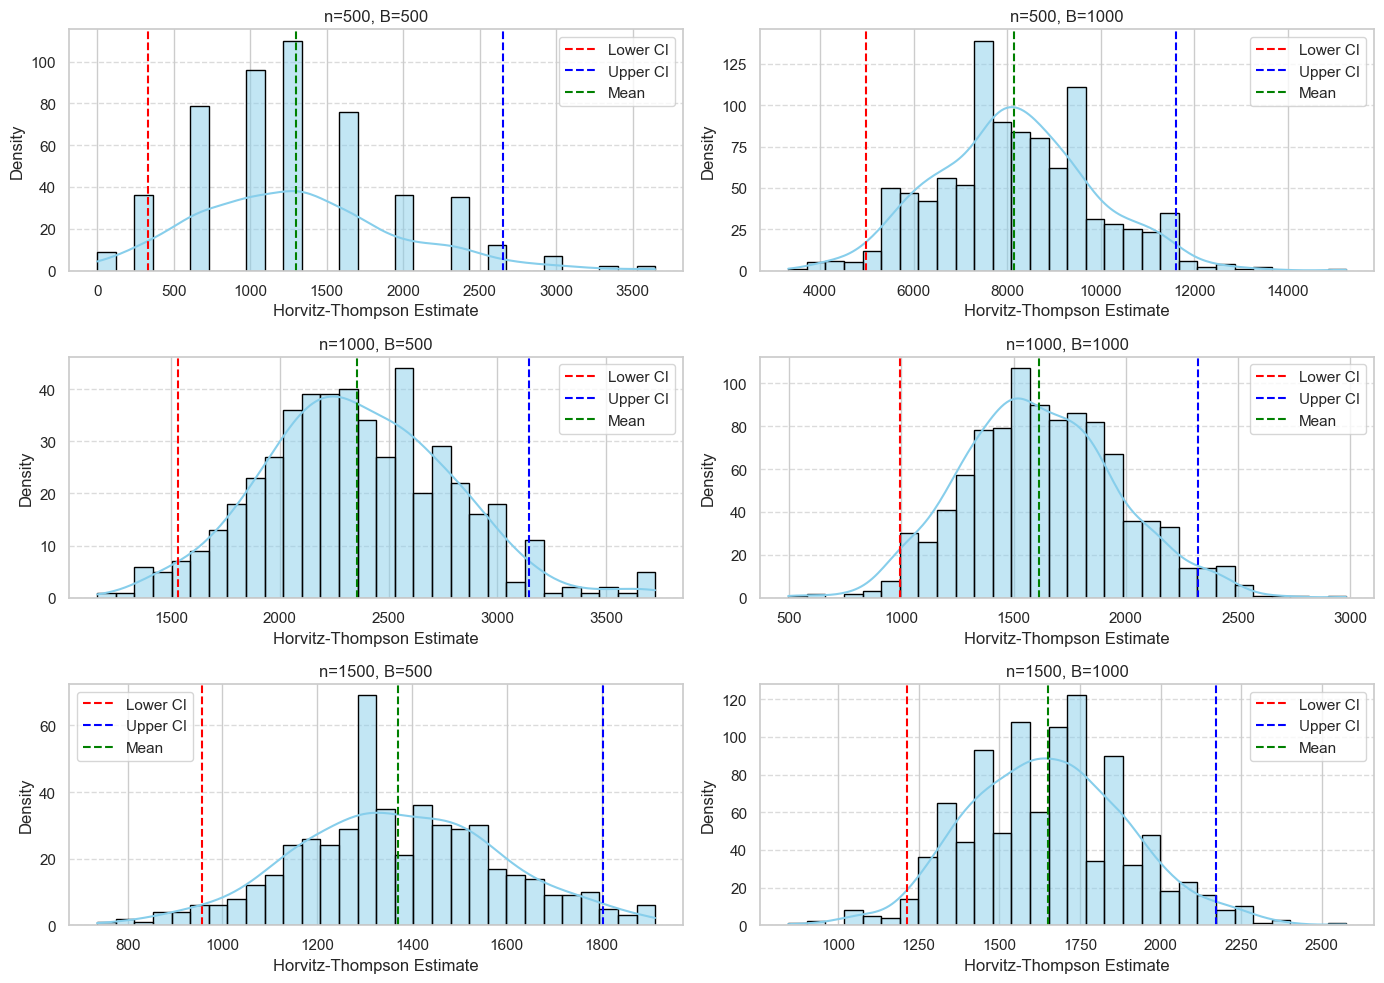

In [18]:
# Constants
n_values = [500, 1000, 1500]  # Different sizes of each induced subgraph sample
B_values = [500, 1000]  # Different number of bootstrap samples

# Set a seaborn style for improved aesthetics
sns.set(style="whitegrid")

# Function to calculate Horvitz-Thompson estimate
def horvitz_thompson_estimate(sample_edges_count, NV, n):
    fi = n * (n - 1) / (NV * (NV - 1))
    return sample_edges_count / fi

# Create subplots
fig, axes = plt.subplots(len(n_values), len(B_values), figsize=(14, 10))

for i, n in enumerate(n_values):
    for j, B in enumerate(B_values):
        # Bootstrap procedure
        bootstrap_estimates = []

        # Induced subgraph
        subgraph_vertices = np.random.choice(nodes['id'], size=n, replace=False)
        subgraph_edges = edges[
                (edges['id_1'].isin(subgraph_vertices)) & (edges['id_2'].isin(subgraph_vertices))
            ]

        for _ in range(B):
            # Step 1: Draw Vú of size n uniformly from V with replacement
            sample_edges = subgraph_edges.sample(n=n, replace=True)

            # Step 2: Choose Eú
            sample_edges = sample_edges.merge(nodes[['id', 'page_type']], how='left', left_on='id_1', right_on='id').merge(
                nodes[['id', 'page_type']], how='left', left_on='id_2', right_on='id'
            )

            # Filter edges connecting TV-shows with politicians or government agencies
            tv_politics_edges = sample_edges[
                (sample_edges['page_type_x'] == 'tvshow') & (
                    (sample_edges['page_type_y'] == 'politician')
                ) | (sample_edges['page_type_x'] == 'politician') & (
                    (sample_edges['page_type_y'] == 'tvshow')
                )
            ]
            # Step 3: Calculate Horvitz-Thompson estimate
            NV = len(nodes)
            estimate = horvitz_thompson_estimate(tv_politics_edges.shape[0], NV, n)
            bootstrap_estimates.append(estimate)

        # Calculate confidence interval
        confidence_interval = np.percentile(bootstrap_estimates, [2.5, 97.5])
        mean_value = np.mean(bootstrap_estimates)

        # Plot the bootstrap distribution with KDE (Kernel Density Estimate)
        sns.histplot(bootstrap_estimates, bins=30, kde=True, color='skyblue', edgecolor='black', ax=axes[i, j])
        axes[i, j].axvline(x=confidence_interval[0], color='red', linestyle='--', label='Lower CI')
        axes[i, j].axvline(x=confidence_interval[1], color='blue', linestyle='--', label='Upper CI')

        # Add line and annotation for the mean value
        axes[i, j].axvline(x=mean_value, color='green', linestyle='--', label='Mean')

        # Set plot titles and labels
        axes[i, j].set_title(f'n={n}, B={B}')
        axes[i, j].set_xlabel('Horvitz-Thompson Estimate')
        axes[i, j].set_ylabel('Density')
        axes[i, j].legend()
        axes[i, j].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

## Subtask b)
Verify the validity of your method by running a Montecarlo simulation, recalling that
you know the true population proportion since the population graph is given.

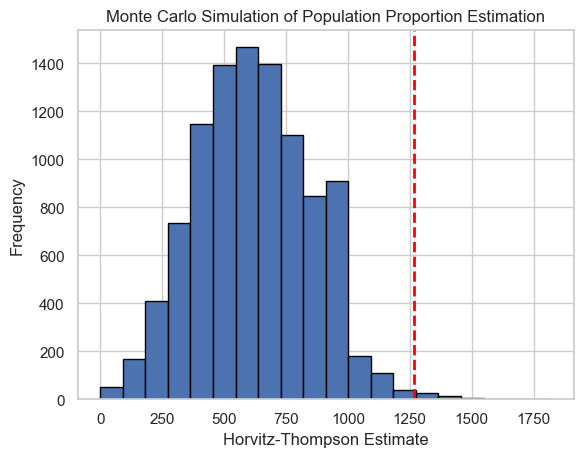

In [19]:
# Constants
B = 10000  # Number of bootstrap samples
n = 1000  # Size of each induced subgraph sample

# Function to calculate Horvitz-Thompson estimate
def horvitz_thompson_estimate(sample_edges_count, NV, n):
    fi = n * (n - 1) / (NV * (NV - 1))
    return sample_edges_count / fi


# proba 
true_tv_politics_edges = edges.merge(
    nodes[['id', 'page_type']], how='left', left_on='id_1', right_on='id'
).merge(
    nodes[['id', 'page_type']], how='left', left_on='id_2', right_on='id'
)

true_tv_politics_edges = true_tv_politics_edges[
    ((true_tv_politics_edges['page_type_x'] == 'tvshow') & (true_tv_politics_edges['page_type_y'] == 'politician')) |
    ((true_tv_politics_edges['page_type_x'] == 'politician') & (true_tv_politics_edges['page_type_y'] == 'tvshow'))
]

# Bootstrap procedure
montecarlo_estimate = []

for _ in range(B):
    # Step 1: Draw Vú of size n uniformly from V with replacement
    sample_edges1 = edges.sample(n=n, replace=False)
    
    sample_edges = sample_edges1.merge(
        nodes[['id', 'page_type']], how='left', left_on='id_1', right_on='id'
    ).merge(
        nodes[['id', 'page_type']], how='left', left_on='id_2', right_on='id'
    )

    # Filter edges connecting TV-shows with politicians or government agencies
    tv_politics_edges = sample_edges[
        (sample_edges['page_type_x'] == 'tvshow') & (
            (sample_edges['page_type_y'] == 'politician')
        ) | (sample_edges['page_type_x'] == 'politician') & (
            (sample_edges['page_type_y'] == 'tvshow')
        )
    ]

    NV = len(nodes)
    estimate = horvitz_thompson_estimate(tv_politics_edges.shape[0], NV, n)
    montecarlo_estimate.append(estimate)

plt.axvline(x=len(true_tv_politics_edges), color='red', linestyle='dashed', linewidth=2, label='True Population Proportion')

# Visualize the results
plt.hist(montecarlo_estimate, bins=20, edgecolor='black')
plt.title('Monte Carlo Simulation of Population Proportion Estimation')
plt.xlabel('Horvitz-Thompson Estimate')
plt.ylabel('Frequency')
plt.show()

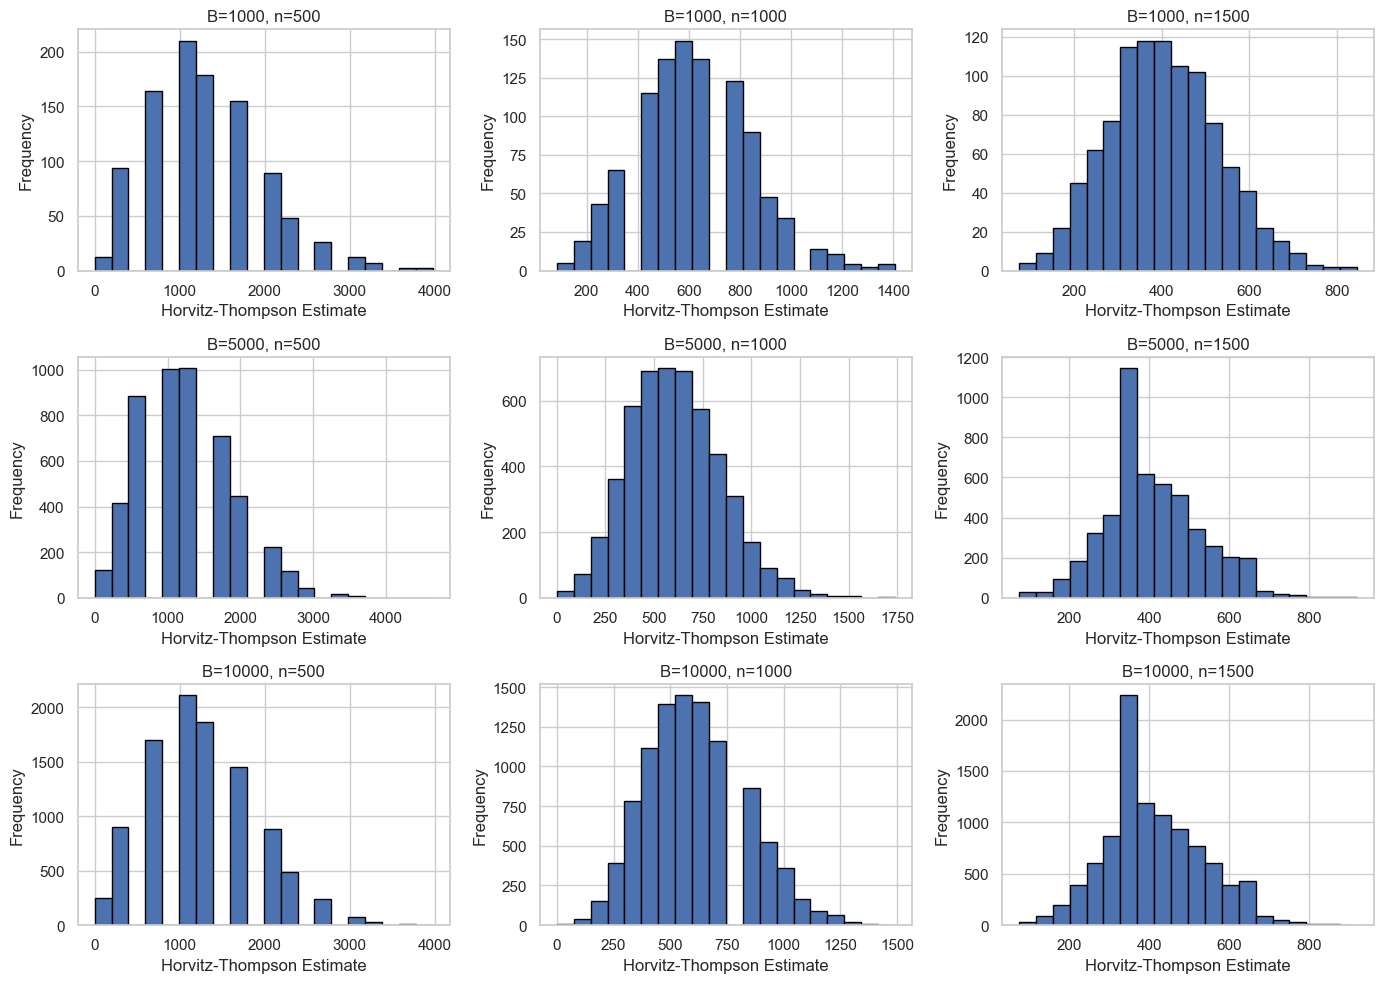

In [20]:
B_values = [1000, 5000, 10000]  # Different number of Monte Carlo simulations
n_values = [500, 1000, 1500]  # Different sizes of each sample

# Function to calculate Horvitz-Thompson estimate
def horvitz_thompson_estimate(sample_edges_count, NV, n):
    fi = n * (n - 1) / (NV * (NV - 1))
    return sample_edges_count / fi

# True TV-politics edges
true_tv_politics_edges = edges.merge(
    nodes[['id', 'page_type']], how='left', left_on='id_1', right_on='id'
).merge(
    nodes[['id', 'page_type']], how='left', left_on='id_2', right_on='id'
)

true_tv_politics_edges = true_tv_politics_edges[
    ((true_tv_politics_edges['page_type_x'] == 'tvshow') & (true_tv_politics_edges['page_type_y'] == 'politician')) |
    ((true_tv_politics_edges['page_type_x'] == 'politician') & (true_tv_politics_edges['page_type_y'] == 'tvshow'))
]

# Monte Carlo simulation
plt.figure(figsize=(14, 10))

for i, B in enumerate(B_values):
    for j, n in enumerate(n_values):
        # Bootstrap procedure
        montecarlo_estimate = []

        for _ in range(B):
            # Step 1: Draw Vú of size n uniformly from V with replacement
            sample_edges1 = edges.sample(n=n, replace=False)

            sample_edges = sample_edges1.merge(
                nodes[['id', 'page_type']], how='left', left_on='id_1', right_on='id'
            ).merge(
                nodes[['id', 'page_type']], how='left', left_on='id_2', right_on='id'
            )

            # Filter edges connecting TV-shows with politicians or government agencies
            tv_politics_edges = sample_edges[
                (sample_edges['page_type_x'] == 'tvshow') & (
                    (sample_edges['page_type_y'] == 'politician')
                ) | (sample_edges['page_type_x'] == 'politician') & (
                    (sample_edges['page_type_y'] == 'tvshow')
                )
            ]

            NV = len(nodes)
            estimate = horvitz_thompson_estimate(tv_politics_edges.shape[0], NV, n)
            montecarlo_estimate.append(estimate)

        # Plot the true population proportion as a dashed red line
        plt.subplot(len(B_values), len(n_values), i * len(n_values) + j + 1)


        # Plot the Monte Carlo estimates
        plt.hist(montecarlo_estimate, bins=20, edgecolor='black')
        plt.title(f'B={B}, n={n}')
        plt.xlabel('Horvitz-Thompson Estimate')
        plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [21]:
edges.shape

(171002, 2)